## Setting up the environment

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from math import sqrt

## Data Importation

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv")

In [3]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# EDA

#### Look at the median_house_value variable. Does it have a long tail?

C:\Users\v-brianadams\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\v-brianadams\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


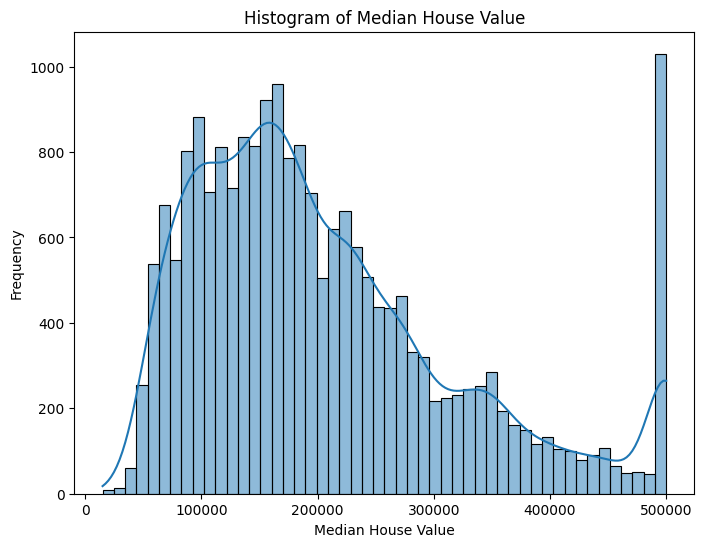

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(data=dataset, x="median_house_value", bins=50, kde=True)
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Histogram of Median House Value")
plt.show()

### Dataset Selection

In [7]:
subset_dataset = dataset[dataset['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]


In [8]:
subset_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN


In [9]:
cols = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]

In [10]:
subset_dataset = subset_dataset[cols]


In [11]:
subset_dataset.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


# Question 1

#### There's one feature with missing values. What is it?

In [13]:
subset_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15687 entries, 701 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            15687 non-null  float64
 1   longitude           15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [14]:
subset_dataset.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

# Question 2
### Median (50% percentile) for variable 'population'?

In [19]:
subset_dataset['population'].median()

1195.0

# Dataset Split

In [24]:
new_dataset = subset_dataset.sample(frac=1, random_state=42)

# train/val/test sets (60%/20%/20%)
train_size = 0.6
val_size = 0.2
test_size = 0.2

train_dataset, temp_dataset = train_test_split(new_dataset, test_size=1 - train_size, random_state=42)
val_dataset, test_dataset = train_test_split(temp_dataset, test_size=test_size/(test_size + val_size), random_state=42)

### Log transformation to the 'median_house_value' variable

In [25]:
train_dataset['median_house_value'] = np.log1p(train_dataset['median_house_value'])
val_dataset['median_house_value'] = np.log1p(val_dataset['median_house_value'])
test_dataset['median_house_value'] = np.log1p(test_dataset['median_house_value'])

# Question 3: Missing values

#### Fill missing values with 0

In [33]:
train_dataset_zero_fill = train_dataset.fillna(0)
val_dataset_zero_fill = val_dataset.fillna(0)

#### Fill missing values with the mean

In [32]:
total_bedrooms_mean = train_dataset['total_bedrooms'].mean()
train_dataset_mean_fill = train_dataset.fillna(total_bedrooms_mean)
val_dataset_mean_fill = val_dataset.fillna(total_bedrooms_mean)

#### Feature Variables

In [35]:
X_train_dataset_zero_fill = train_dataset_zero_fill.drop('median_house_value', axis=1)
y_train_dataset_zero_fill = train_dataset_zero_fill['median_house_value']
X_val_dataset_zero_fill = val_dataset_zero_fill.drop('median_house_value', axis=1)
y_val_dataset_zero_fill= val_dataset_zero_fill['median_house_value']

In [36]:
X_train_dataset_mean_fill = train_dataset_mean_fill.drop('median_house_value', axis=1)
y_train_dataset_mean_fill = train_dataset_mean_fill['median_house_value']
X_val_dataset_mean_fill = val_dataset_mean_fill.drop('median_house_value', axis=1)
y_val_dataset_mean_fill = val_dataset_mean_fill['median_house_value']

# Linear Regression Model Training

In [39]:
zero_fill_model = LinearRegression()
zero_fill_model.fit(X_train_dataset_zero_fill, y_train_dataset_zero_fill)

LinearRegression()

In [40]:
mean_fill_model = LinearRegression()
mean_fill_model.fit(X_train_dataset_mean_fill, y_train_dataset_mean_fill)

LinearRegression()

## Computing the mean, use the training only!

In [41]:
y_pred_zero_fill = zero_fill_model.predict(X_val_dataset_zero_fill)
y_pred_mean_fill = mean_fill_model.predict(X_val_dataset_mean_fill)

## Root Mean Square Error (RMSE)

In [43]:
rmse1 = sqrt(mean_squared_error(y_val_dataset_zero_fill, y_pred_zero_fill))
rmse2 = sqrt(mean_squared_error(y_val_dataset_mean_fill, y_pred_mean_fill))

In [44]:
print("RMSE1: ", round(rmse1, 2))
print("RMSE2: ", round(rmse2, 2))

RMSE1:  0.35
RMSE2:  0.35


# Question 4: Regularization

In [46]:
train_dataset_reg = train_dataset.fillna(0)
val_dataset_reg = val_dataset.fillna(0)

# Features & target variable
X_train_reg = train_dataset_reg.drop('median_house_value', axis=1)
y_train_reg = train_dataset_reg['median_house_value']
X_val_reg = val_dataset_reg.drop('median_house_value', axis=1)
y_val_reg = val_dataset_reg['median_house_value']

# List of regularization strengths (r)
regularization_strengths = [0, 1e-6, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10]

In [49]:
best_rmse = float('inf')
best_r = None

# Loop through different values of r
for r in regularization_strengths:
    # Train Ridge regression model with regularization strength r
    model_reg = Ridge(alpha=r)
    model_reg.fit(X_train_reg, y_train_reg)
    
    # Predict on validation data
    y_pred_reg = model_reg.predict(X_val_reg)
    
    # Calculate RMSE
    rmse_reg = sqrt(mean_squared_error(y_val_reg, y_pred_reg))
    
    # Round RMSE to 2 decimal digits
    rmse_reg_rounded = round(rmse_reg, 2)
    
    # Check if this model has a better RMSE
    if rmse_reg_rounded < best_rmse:
        best_rmse = rmse_reg_rounded
        best_r = r

# Print the best r and corresponding RMSE
print("Best r:", best_r)
print("Best RMSE:", best_rmse)

Best r: 0
Best RMSE: 0.35
